# Modeling and Simulation in Python

Rabbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [130]:
%matplotlib inline

from modsim import *

In [167]:
system = System(t0 = 0, 
                t_end = 10,
                adult_pop0 = 100,
                juvenile_pop0 = 0,
                birth_rate = 0.5,
                death_rate = 0.5,
                mature_rate = 0.33)

system

,value
t0,0.00
t_end,10.00
adult_pop0,100.00
juvenile_pop0,0.00
birth_rate,0.50
death_rate,0.50
mature_rate,0.33


In [182]:
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
    for t in linrange(system.t0, system.t_end):
        if(t < 15):
            system.death_rate = .538
        elif(t < 20):
            system.death_rate = .5
        else:
            system.death_rate = .532
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * adults[t]
        matured = juveniles[t] * (1/3)
        juveniles[t+1] = juveniles[t] + births - matured
        adults[t+1] = adults[t] - deaths + matured 
        
    system.adults = adults
    system.juveniles = juveniles

In [267]:
def run_simulation_ran(system, p = system.death_rate):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
    for t in linrange(system.t0, system.t_end):
              
        count = 0
        if(adults[t] < 0):
            adults[t] = 0
        #if(t < 15):
      #      system.death_rate = .538
      #  elif(t < 20):
      ##      system.death_rate = .5
       # else:
       #     system.death_rate = .532 
        for i in linrange(adults[t]):
            if flip(p):
                count += 1

              
            
        births = system.birth_rate * adults[t]
        deaths = count
        matured = juveniles[t] * (1/3)
        adults[t] += matured
        juveniles[t+1] = juveniles[t] + births - matured
        adults[t+1] = adults[t] - deaths
        count = 0
        if(adults[t] < 0):
            adults[t] = 0
    system.adults = adults
    system.juveniles = juveniles
    system.alive = adults[system.t_end] + juveniles[system.t_end]

In [281]:
system = System(t0 = 0, 
                t_end = 10,
                adult_pop0 = 10,
                juvenile_pop0 = 0,
                birth_rate = 0.5,
                death_max = .5,
                death_rate = 0.2,
                mature_rate = 0.33)

system

,value
t0,0.00
t_end,10.00
adult_pop0,10.00
juvenile_pop0,0.00
birth_rate,0.50
death_max,0.50
death_rate,0.20
mature_rate,0.33


In [135]:
""""def run_simulation(system, death_rate):
    Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
    for t in linrange(system.t0, system.t_end):
        
        births = system.birth_rate * adults[t]
        deaths = death_rate * adults[t]
        matured = juveniles[t] * (1/3)
        juveniles[t+1] = juveniles[t] + births - matured
        adults[t+1] = adults[t] - deaths + matured 
    system.adults = adults
    system.juveniles = juveniles
    system.alive = adults[system.t_end] + juveniles[system.t_end]
""""

SyntaxError: EOL while scanning string literal (<ipython-input-135-4d46bc6bd5d7>, line 24)

In [273]:
def run_simulation(system, death_rate):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
    count = 0
    for t in linrange(system.t0, system.t_end):
        
        if(adults[t] < 0):
            adults[t] = 0
        
        for i in linrange(adults[t]):
            if flip(death_rate):
                count += 1
                
    
   # for t in linrange(system.t0, system.t_end):
        
        births = system.birth_rate * adults[t]
        deaths = count
        matured = juveniles[t] * (1/3)
        juveniles[t+1] = juveniles[t] + births - matured
        adults[t+1] = adults[t] - deaths + matured 
        code = 0
    system.adults = adults
    system.juveniles = juveniles
    system.alive = adults[system.t_end] + juveniles[system.t_end]

In [274]:
def sweep(system):

    probs = linrange(system.death_rate, system.death_max, .01)
    for i in probs:
        run_simulation_ran(system, i)
        plot(i, system.alive, 'rs')

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


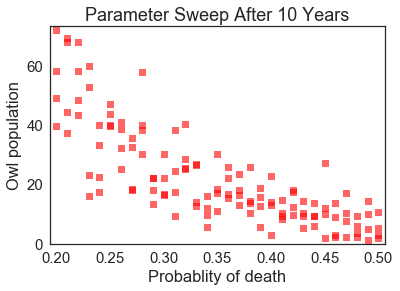

In [278]:
sweep(system)
sweep(system)
sweep(system)
sweep(system)

decorate(xlabel='Probablity of death', 
             ylabel='Owl population',
             title='Parameter Sweep After 10 Years')

Test your changes in `run_simulation`:

In [229]:
run_simulation_ran(system)
system.adults

,value
0,10.000000
1,1.666667
2,2.777778
3,2.796296
4,1.771605
5,1.554527
6,1.205075
7,0.731196
8,1.116122
9,0.494605


Next, update `plot_results` to plot both the adult and juvenile `TimeSeries`.

In [231]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot((system.juveniles + system.adults), 'rs', label = 'Owls')
    decorate(xlabel='Years', 
             ylabel='Owl population',
             title=title)
    

And test your updated version of `plot_results`.

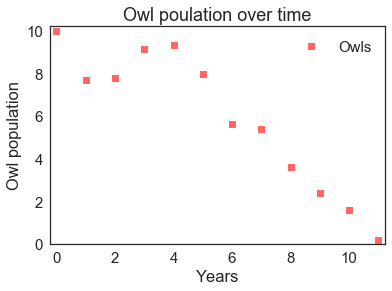

In [282]:
run_simulation_ran(system)
plot_results(system, title='Owl poulation over time')